In [1]:
from ebpy.GLMixture import GLMixture

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(1234567891)

n,p = 1000,2

ang = 2*np.pi*np.random.rand(n)
truth = np.array([2*np.cos(ang), 2*np.sin(ang)]).T

l, u = .5, .7
covs = l + np.random.rand(n,p)*(u-l)
prec = 1/covs
X = truth + covs**(1/2)*np.random.randn(n,p)

In [3]:
m = GLMixture(prec_type='diagonal')

## Compute the NPMLE 
m.fit(X, prec, max_iter_em=1000)

## Denoised estimates based on empirical prior
gmleb = m.posterior_mean(X, prec) 

Selecting all data points as atoms: done.
Computing kernel matrix: done.
Solving for discretized NPMLE: done.


In [4]:
o = GLMixture(prec_type='diagonal')

## Define the Oracle Prior 
o.set_params(atoms=truth, weights=np.ones(n)/n)

## Denoised estimates based on oracle prior
obayes = o.posterior_mean(X, prec)

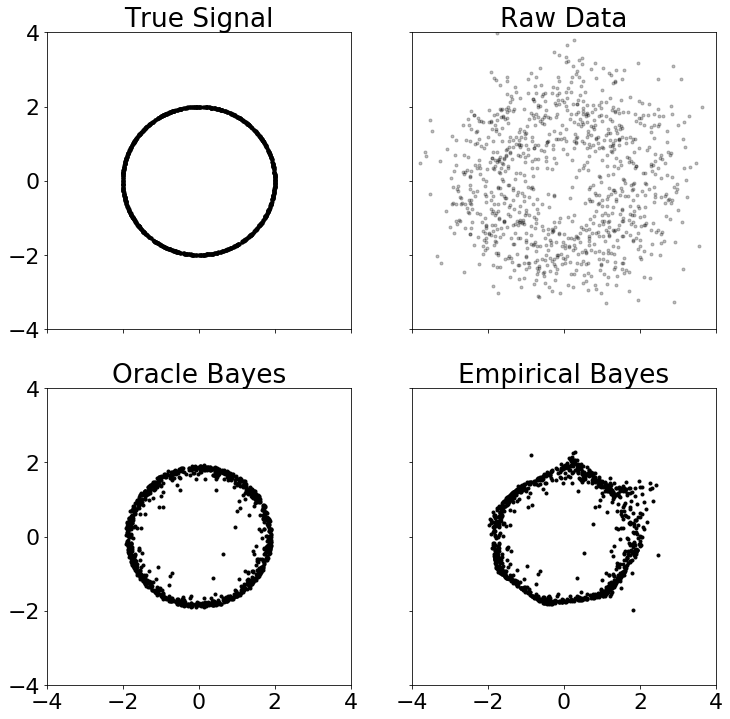

In [5]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,12))

ax[0,0].plot(truth[:,0], truth[:,1], 'k.')
ax[0,1].plot(X[:,0], X[:,1], 'k.', alpha=.25)
ax[1,0].plot(obayes[:,0], obayes[:,1], 'k.')
ax[1,1].plot(gmleb[:,0], gmleb[:,1], 'k.')

M = 4
plt.xlim([-M, M])
plt.ylim([-M, M])

ax[0,0].set_title('True Signal')
ax[0,1].set_title('Raw Data')
ax[1,0].set_title('Oracle Bayes')
ax[1,1].set_title('Empirical Bayes')
plt.savefig('circle_demo.png')
plt.show()